## UNIT 14 NumPy를 활용한 나만의 프로젝트 만들기

In [10]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [11]:
# 예시삼아 pandas로 출력한 csv 파일
pd.read_csv('C:/Users/user/Downloads/202104_202104_연령별인구현황_월간.csv', engine = 'python')

,행정구역,2021년04월_계_총인구수,2021년04월_계_연령구간인구수,2021년04월_계_0~9세,2021년04월_계_10~19세,2021년04월_계_20~29세,2021년04월_계_30~39세,2021년04월_계_40~49세,2021년04월_계_50~59세,2021년04월_계_60~69세,2021년04월_계_70~79세,2021년04월_계_80~89세,2021년04월_계_90~99세,2021년04월_계_100세 이상
0,서울특별시 (1100000000),"9,588,711","9,588,711","607,863","770,905","1,448,195","1,458,508","1,508,768","1,511,117","1,259,839","697,684","282,213","40,883","2,736"
1,서울특별시 종로구 (1111000000),"147,113","147,113","7,306","10,859","23,240","19,729","21,690","25,125","20,153","12,006","5,990",951,64
2,서울특별시 종로구 청운효자동(1111051500),"12,063","12,063",785,"1,144","1,575","1,608","2,125","1,917","1,372",941,520,69,7
3,서울특별시 종로구 사직동(1111053000),"9,535","9,535",571,678,"1,245","1,455","1,489","1,546","1,228",771,469,78,5
4,서울특별시 종로구 삼청동(1111054000),"2,519","2,519",107,190,308,332,358,394,400,253,143,28,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,제주특별자치도 서귀포시 서홍동(5013058000),"10,810","10,810","1,178","1,424","1,235","1,209","1,972","1,613","1,132",722,283,40,2
3842,제주특별자치도 서귀포시 대륜동(5013059000),"15,033","15,033","1,553","1,346","1,544","2,206","2,566","2,272","1,931","1,075",469,66,5
3843,제주특별자치도 서귀포시 대천동(5013060000),"13,878","13,878","1,653","1,256","1,446","2,170","2,476","2,025","1,550",839,396,64,3
3844,제주특별자치도 서귀포시 중문동(5013061000),"11,573","11,573",934,"1,149","1,344","1,539","2,002","1,897","1,344",810,488,61,5


1. 문제 정의  
'우리 동네의 인구 구조와 가장 비슷한 지역은 어디일까?'  
→ 어떤 곳의 인구 구조가 비슷하다  
= 다른 동의 각 연령대별 인구 비율이 우리 동의 연령대별 비율과 차이가 0에 근접한다  
→ '우리 동네의 전체 인구 대비 각 연령대별 인구의 차이가 거의 없는 지역은 어디일까?'
  
  
2. 알고리즘 설명  
데이터 읽기  
→ 궁금한 지역의 이름 입력받기  
→ 입력받은 지역의 인구 구조 출력  
→ 입력받은 지역의 인구 구조를 저장  
→ 다른 지역의 각 연령별 인구 비율이 우리 구와 가장 비슷한 지역 분석  
→ 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화
  
  
3. 정확성 증명  
코드 반복 실행을 통해 확인  
  
  
4. 성능 분석  
여기서는 생략

인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 영종동


<ipython-input-13-d3dd09c739c7>:26: RuntimeWarning: invalid value encountered in true_divide
  away = np.array(row[3:], dtype = int) / int(row[2])


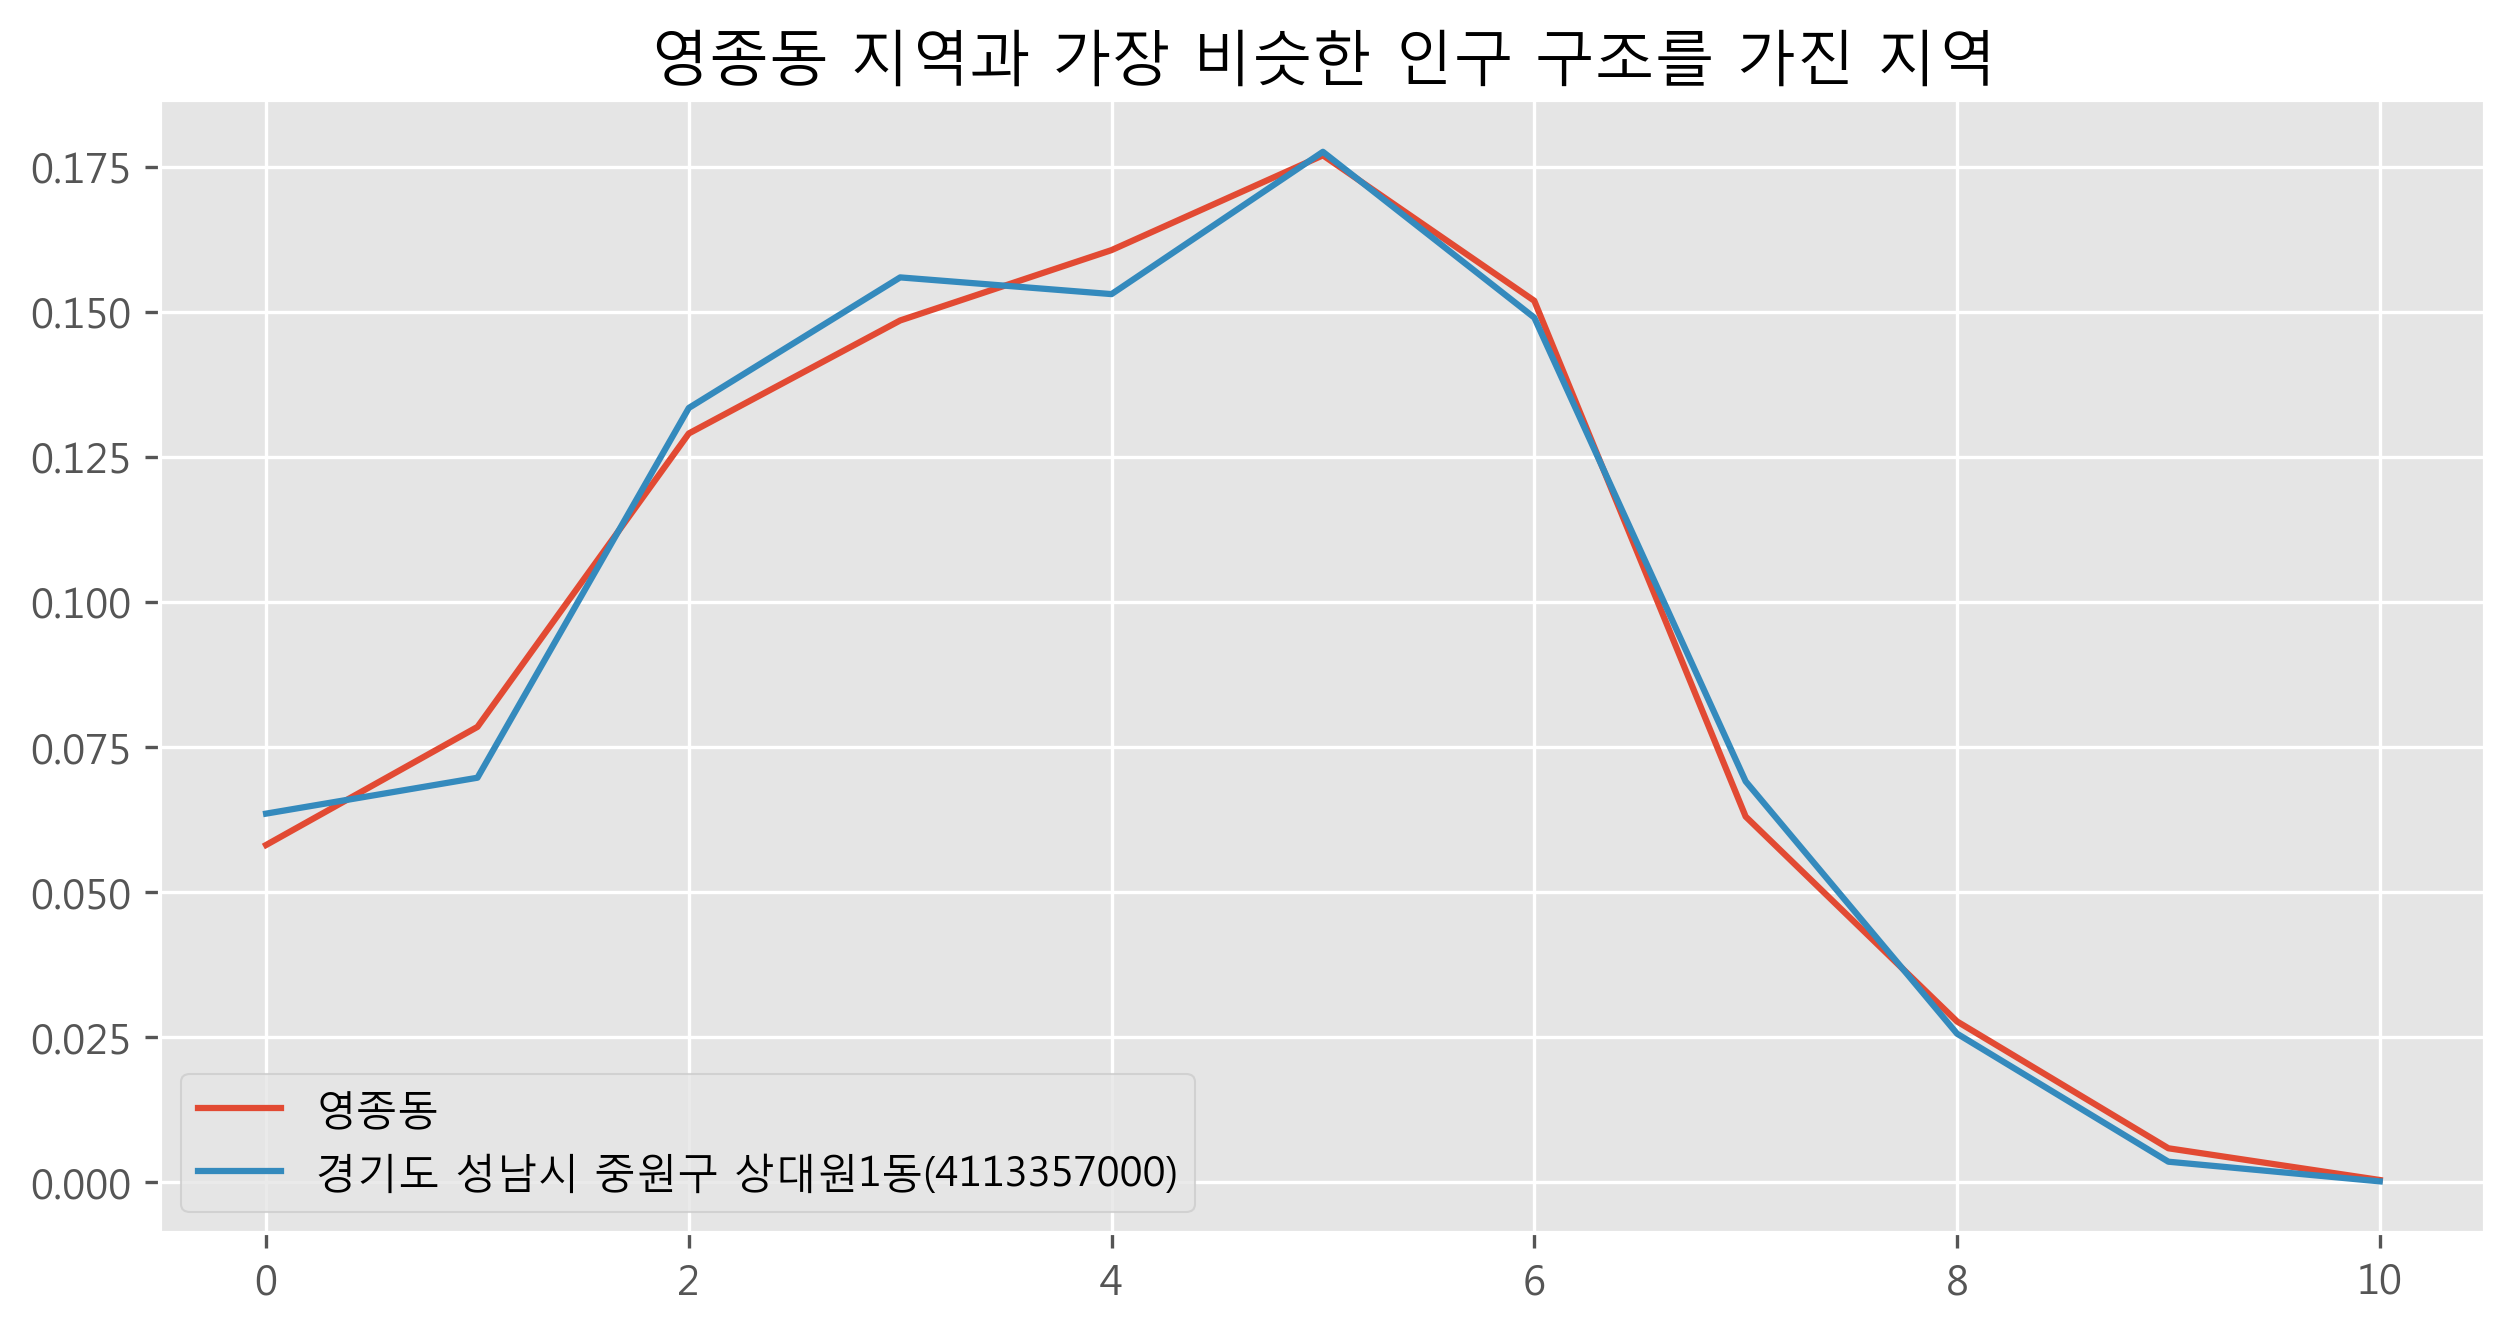

<function TextIOWrapper.close()>

In [13]:
# 출근 시간대 사람들이 가장 많이 타고 내리는 역 찾기
# 데이터 읽기
f = open('C:/Users/user/Downloads/202104_202104_연령별인구현황_월간.csv',encoding='cp949')
data = csv.reader(f)
next(data)
data = list(data)
for row in data :
    # 파이썬 코딩으로 쉼표 직접 제거한 후 map() 함수 적용
    for i in range(1,len(row)):
        row[i] = row[i].replace(',','')

# 궁금한 지역의 이름 입력받기
name = input('인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ')
mn = 1
result_name = ""
result = 0

# 입력받은 지역의 인구 구조 출력하고 저장
for row in data :
    if name in row[0] : # 입력받은 지역의 이름이 포함된 행 분석
        # 연령별 인구수 비율 = 연령별 인구수 / 전체 인구수
        home = np.array(row[3:], dtype = int) / int(row[2])

# 다른 지역의 각 연령별 인구 비율이 우리 구와 가장 비슷한 지역 분석
for row in data :
    away = np.array(row[3:], dtype = int) / int(row[2])
# 다른 동의 각 연령대별 인구 비율이 우리 동의 연령대별 비율과 차이가 0에 근접하는 곳 분석
    s = np.sum((home - away)**2) # SSE
    if s < mn and name not in row[0] :
        mn = s
        result_name = row[0]
        result = away

# 가장 비슷한 곳의 인구 구조와 궁금한 지역의 인구 구조를 시각화
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi = 300)
plt.title(name + ' 지역과 가장 비슷한 인구 구조를 가진 지역')
plt.plot(home, label = name)
plt.plot(result, label = result_name)
plt.legend()
plt.show()
f.close

## UNIT 15 테이블 형태의 데이터를 쉽게 다루도록 도와주는 pandas 라이브러리

In [30]:
# 하계올림픽 금메달 순위 순으로 내림차순하는 표 출력

# import pandas as pd는 앞에 이미 실행했으니 생략
# header = 숫자 : 열의 이름을 행 인덱스에 해당하는 값으로 지정
# index_col = 0 : 인덱스 이름을 인덱스에 해당하는 값으로 지정
df = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table', header = 0, index_col = 0)
# .iloc[a:b, c:d] : 앞의 리스트는 행, 뒤의 리스트는 열에 접근하는 메소드
summer = df[1].iloc[:, :5] # 하계올림픽 데이터만
summer.columns = ['경기수', '금', '은', '동', '계']
# 금메달 기준으로 내림차순 정렬
summer.sort_values('금', ascending = False)
summer.to_excel('하계올림픽메달.xlsx') # 표를 엑셀 파일로 저장

In [31]:
summer

,경기수,금,은,동,계
Team,,,,,
Team (IOC code),№,NaN,NaN,NaN,Total
Afghanistan (AFG),14,0.0,0.0,2.0,2
Algeria (ALG),13,5.0,4.0,8.0,17
Argentina (ARG),24,21.0,25.0,28.0,74
Armenia (ARM),6,2.0,6.0,6.0,14
...,...,...,...,...,...
Zimbabwe (ZIM) [ZIM],13,3.0,4.0,1.0,8
Independent Olympic Athletes (IOA) [IOA],3,1.0,0.0,1.0,2
Independent Olympic Participants (IOP) [IOP],1,0.0,1.0,2.0,3


In [55]:
# 날짜 형태의 인덱스 8개 만들기
index = pd.date_range('1/1/2000', periods = 8)
print(index)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')


In [56]:
# 8×3 행렬로 구성된 랜덤 데이터를 만들어 데이터프레임 만들기
# np.random.rand(8,3) : 8×3 행렬로 구성된 랜덤 데이터 생성
# columns = list('ABC') : 작은따옴표에 쓰인 문자 하나씩 column명으로 지정
df = pd.DataFrame(np.random.rand(8,3), index = index, columns = list('ABC'))
df

,A,B,C
2000-01-01,0.161587,0.713663,0.764296
2000-01-02,0.504096,0.948780,0.026266
2000-01-03,0.061429,0.722144,0.648581
2000-01-04,0.955902,0.175868,0.935404
2000-01-05,0.567280,0.800682,0.521076
2000-01-06,0.251021,0.629673,0.532780
2000-01-07,0.829647,0.737270,0.681341
2000-01-08,0.495829,0.573132,0.337604


In [57]:
# NumPy의 마스크 기능 적용 : B열의 값이 0.4보다 큰지 확인
df2 = df[df['B'] > 0.4]
# .T : 행과 열의 위치 뒤집기
df2.T

,2000-01-01,2000-01-02,2000-01-03,2000-01-05,2000-01-06,2000-01-07,2000-01-08
A,0.161587,0.504096,0.061429,0.567280,0.251021,0.829647,0.495829
B,0.713663,0.948780,0.722144,0.800682,0.629673,0.737270,0.573132
C,0.764296,0.026266,0.648581,0.521076,0.532780,0.681341,0.337604


In [58]:
df['D'] = df['A'] / df['B']  # A열의 값을 B열의 값으로 나눈 값을 D열에 저장
df

,A,B,C,D
2000-01-01,0.161587,0.713663,0.764296,0.226419
2000-01-02,0.504096,0.948780,0.026266,0.531310
2000-01-03,0.061429,0.722144,0.648581,0.085065
2000-01-04,0.955902,0.175868,0.935404,5.435343
2000-01-05,0.567280,0.800682,0.521076,0.708496
2000-01-06,0.251021,0.629673,0.532780,0.398653
2000-01-07,0.829647,0.737270,0.681341,1.125296
2000-01-08,0.495829,0.573132,0.337604,0.865123


In [59]:
# axis = 0 : 행 방향으로 계산, axis = 1 : 열 방향으로 계산
df['E'] = np.sum(df, axis = 1)  # 행 우선 계산 값을 E열에 저장
# 같은 코드를 반복 실행하면 E 열의 값이 계속 늘어나므로 주의
df.head()

,A,B,C,D,E
2000-01-01,0.161587,0.713663,0.764296,0.226419,1.865965
2000-01-02,0.504096,0.948780,0.026266,0.531310,2.010453
2000-01-03,0.061429,0.722144,0.648581,0.085065,1.517218
2000-01-04,0.955902,0.175868,0.935404,5.435343,7.502518
2000-01-05,0.567280,0.800682,0.521076,0.708496,2.597534


In [60]:
df = df.sub(df['A'], axis=0)  # A열의 데이터를 기준으로 열 우선 계산
df = df.div(df['C'], axis=0)    # C열 데이터를 기준으로 열 우선 계산
df.to_csv('test.csv')           # 데이터 프레임을 test.csv 파일로 저장
df.head()

,A,B,C,D,E
2000-01-01,0.0,0.915991,1.0,0.107568,2.827862
2000-01-02,-0.0,-0.930632,1.0,-0.056952,-3.152494
2000-01-03,0.0,1.125289,1.0,0.040255,2.479409
2000-01-04,-0.0,38.054111,1.0,-218.530235,-319.377689
2000-01-05,-0.0,-5.051567,1.0,-3.056355,-43.941123


원하는 지역의 이름을 입력해주세요 : 영종동


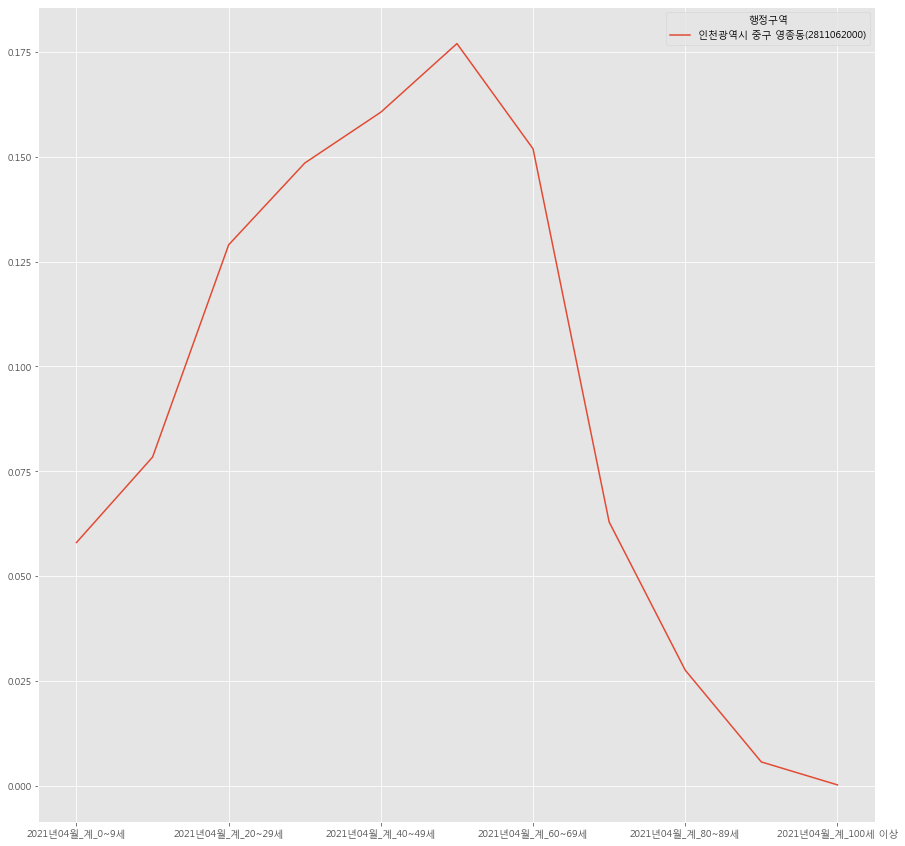

In [22]:
# 원하는 지역의 인구수를 pandas를 이용해서 출력하기
# thousands = ',' : 천단위 구분 쉼표 제거
df = pd.read_csv('C:/Users/user/Downloads/202104_202104_연령별인구현황_월간.csv', encoding = 'cp949', index_col=0, thousands = ',')
# 전체 데이터를 총인구수로 나눠서 비율로 변환
df = df.div(df['2021년04월_계_총인구수'], axis = 0)
# 총인구수, 연령구간인구수 열 삭제
del df['2021년04월_계_총인구수'], df['2021년04월_계_연령구간인구수']

# 지역 이름 입력
name = input('원하는 지역의 이름을 입력해주세요 : ')  
# 해당 행을 찾아서 해당 지역의 인구 구조를 저장
a = df.index.str.contains(name)
df2 = df[a]

# 궁금한 지역 A의 인구 비율에서 B의 인구 비율을 빼기
x = df.sub(df2.iloc[0], axis = 1)
# A의 인구 비율에서 B의 인구 비율을 뺀 값의 제곱 값을 모두 더하기 = SSE 구하기
y = np.power(x, 2)
z = y.sum(axis = 1)
i = z.sort_values().index[:5]  # 그 차이가 가장 작은 지역 5곳을 찾기

# plt.rc('font', family='Malgun Gothic')는 앞에서 이미 실행했으므로 생략
plt.rcParams["figure.figsize"] = (15, 15)
df2.T.plot()
plt.show()